## Unconditional and conditional diffusion training analysis 

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from scipy.linalg import lstsq

Training loss and learning rate paths:

In [3]:
path_unconditional_lr = '/data/capstone_data/images/train_unconditional_lr.csv'
path_unconditional_loss = '/data/capstone_data/images/train_unconditional_loss.csv'

path_conditional_lr = '/data/capstone_data/images/train_conditional_lr.csv'
path_conditional_loss = '/data/capstone_data/images/train_conditional_loss.csv'
#path_conditional_loss = '/data/capstone_data/images/train_conditional_loss2.csv'

In [4]:
unconditional_lr = pd.read_csv(path_unconditional_lr)
unconditional_loss = pd.read_csv(path_unconditional_loss)
conditional_lr = pd.read_csv(path_conditional_lr)
conditional_loss = pd.read_csv(path_conditional_loss)

In [5]:
print(len(unconditional_lr))
unconditional_lr.head()

1000


,Wall time,Step,Value
0,1.712095e+09,245,0.000049
1,1.712095e+09,466,0.000093
2,1.712095e+09,659,0.000100
3,1.712095e+09,805,0.000100
4,1.712095e+09,1133,0.000100


In [8]:
print(len(unconditional_loss))
unconditional_loss.head()

1000


,Wall time,Step,Value
0,1.712095e+09,245,0.014453
1,1.712095e+09,466,0.013208
2,1.712095e+09,659,0.074780
3,1.712095e+09,805,0.019758
4,1.712095e+09,1133,0.037641


In [9]:
np.min(unconditional_loss['Value']), np.max(unconditional_loss['Value'])

(0.0013066899264231, 0.156589388847351)

In [13]:
# smoothes data over x axis to make it easier to see average
def smooth_line(data, window_size=20):
    # Apply moving average
    smoothed_data = data.rolling(window=window_size).mean()
    return smoothed_data

# Unconditional diffusion loss smoothing over the y-values
unc_smoothed_loss = smooth_line(unconditional_loss['Value'])

# Conditional diffusion loss smoothing over the y-values
cond_smoothed_loss = smooth_line(conditional_loss['Value'])

### Least squares fit of unconditional training loss:

In [34]:
x = unconditional_loss['Step']
y = unconditional_loss['Value']

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

(-2.2480034819891227e-08, 0.03392600553167862)

### Unonditional Training: DOQ image generation

/tmp/ipykernel_4208/2078054564.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_4208/2078054564.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_4208/2078054564.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='right')


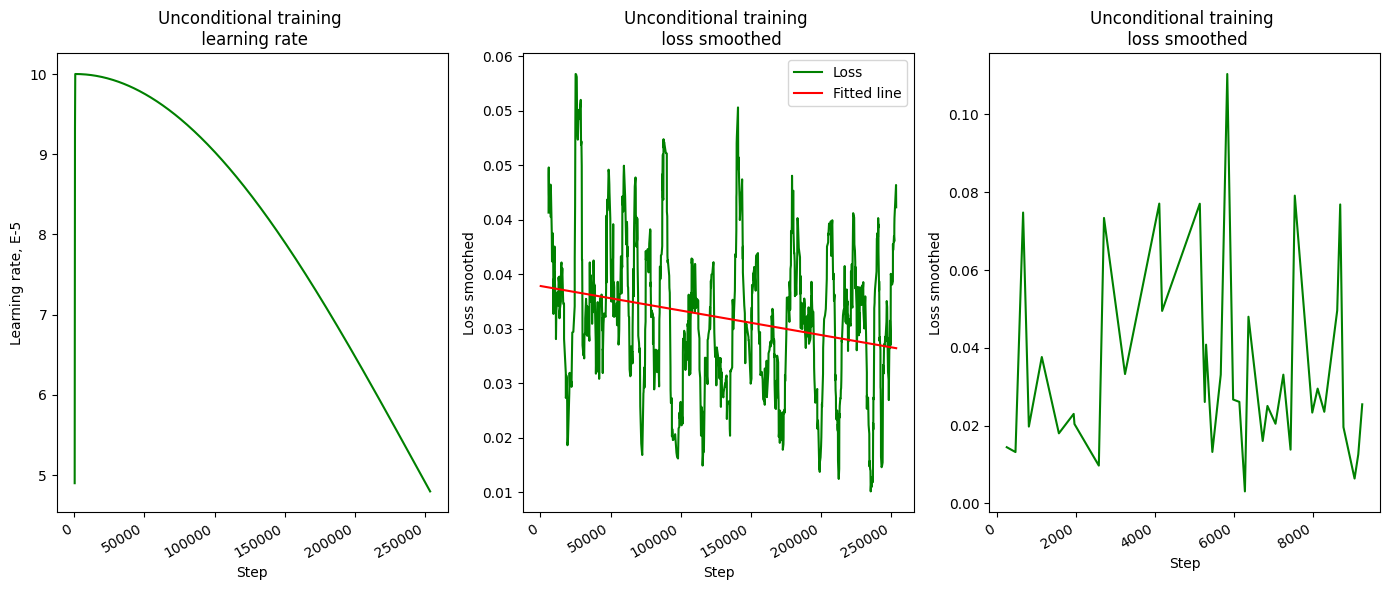

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
axs[0].plot(unconditional_lr['Step'], unconditional_lr['Value']*100000, 'g', )
axs[0].set_title("Unconditional training \n learning rate")
axs[1].plot(unconditional_loss['Step'], unc_smoothed_loss, 'g', label='Loss')
axs[1].set_title("Unconditional training \n loss smoothed")
axs[1].plot(x, m*x + c, 'r', label='Fitted line')
axs[1].legend()

axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[2].plot(unconditional_loss['Step'][0:40], unconditional_loss['Value'][0:40], 'g', )
axs[2].set_title("Unconditional training \n loss smoothed")

axs[0].set_xlabel('Step')
axs[1].set_xlabel('Step')
axs[2].set_xlabel('Step')

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='right')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='right')


axs[0].set_ylabel('Learning rate, E-5')
axs[1].set_ylabel('Loss smoothed')
axs[2].set_ylabel('Loss smoothed')


fig.tight_layout()

plt.savefig('/data/images/uncond_net_training.png', dpi=300)


### Conditional Training: Despeckling

In [16]:
print(len(conditional_lr))
conditional_lr.head()

1000


,Wall time,Step,Value
0,1.713128e+09,173,0.000035
1,1.713128e+09,245,0.000049
2,1.713128e+09,466,0.000093
3,1.713128e+09,557,0.000100
4,1.713129e+09,659,0.000100


In [17]:
print(len(conditional_loss))
conditional_loss.head()

1000


,Wall time,Step,Value
0,1.713128e+09,173,0.052715
1,1.713128e+09,245,0.032558
2,1.713128e+09,466,0.048271
3,1.713128e+09,557,0.047039
4,1.713129e+09,659,0.021121


In [18]:
np.min(conditional_loss['Value']), np.max(conditional_loss['Value'])

(0.0006788282771594, 0.0878926143050193)

### Least squares fit of unconditional training loss:

In [19]:
x = conditional_loss['Step']
y = conditional_loss['Value']

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

(-6.214974052869487e-09, 0.020126779453774026)

/tmp/ipykernel_4208/2930579987.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_4208/2930579987.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_4208/2930579987.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='right')


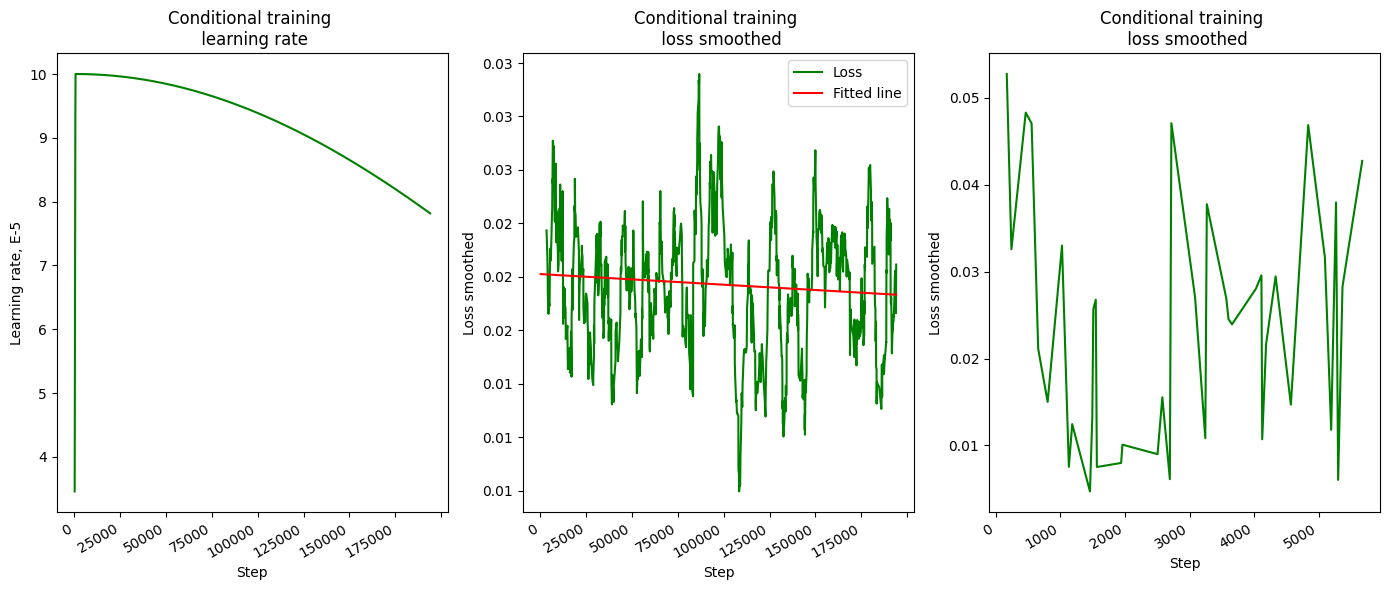

In [32]:
# Conditional diffusion training:

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
axs[0].plot(conditional_lr['Step'], conditional_lr['Value']*100000, 'g', )
axs[0].set_title("Conditional training \n learning rate")
axs[1].plot(conditional_loss['Step'], cond_smoothed_loss, 'g', label='Loss')
axs[1].set_title("Conditional training \n loss smoothed")
axs[1].plot(x, m*x + c, 'r', label='Fitted line')
axs[1].legend()
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[2].plot(conditional_loss['Step'][0:40], conditional_loss['Value'][0:40], 'g', )

axs[2].set_title("Conditional training \n loss smoothed")

axs[0].set_xlabel('Step')
axs[1].set_xlabel('Step')
axs[2].set_xlabel('Step')


axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='right')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='right')


axs[0].set_ylabel('Learning rate, E-5')
axs[1].set_ylabel('Loss smoothed')
axs[2].set_ylabel('Loss smoothed')

fig.tight_layout()

plt.savefig('/data/images/cond_net_training.png', dpi=300)

Text(0, 0.5, 'Loss')

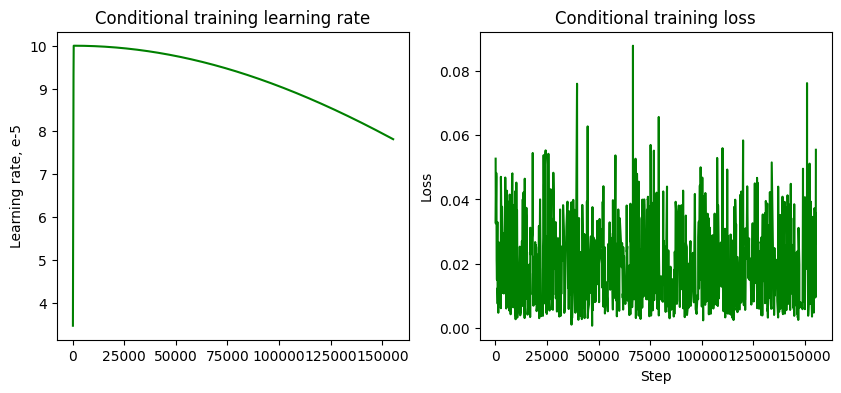

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(conditional_lr['Step'], conditional_lr['Value']*100000, 'g', )
axs[0].set_title("Conditional training learning rate")
axs[1].plot(conditional_loss['Step'], conditional_loss['Value'], 'g', )
axs[1].set_title("Conditional training loss")
plt.xlabel('Step')
axs[0].set_ylabel('Learning rate, e-5')
axs[1].set_ylabel('Loss')


In [197]:
np.max(unconditional_loss['Step']), np.max(conditional_loss['Step'])

(253661, 155235)

In [36]:
# number of steps per epoch
155235/30

5174.5

loss 'bounces around' without any obvious trend or decline. This appears to be a common issue with stable diffusion and the network still apears to learn without reducing training loss. 
In unconditional training the loss actually appears to be increasing at the beggining (first few hundred steps). However, if smoothed overall there is overall reduction in loss in the unconditional training. 

" images based diffusion models don’t have super clean or well understood loss graphs yet. iirc the cold diffusion paper covers some of this and looks at training diffusion networks from first principles [2208.09392] Cold Diffusion: Inverting Arbitrary Image Transforms Without Noise 66"

" the loss function isn’t actually evaluating the image but only the denoising, and there is generally a degree of noise inherent to the images themselves. So we’re really talking about the model learning to “move noise around” correctly, rather than removing it (which could result in an “incorrect” image). "

https://discuss.huggingface.co/t/loss-drops-normally-but-stops-improving-quickly/32050